In [27]:
#데이터 압축 해제
'''
import zipfile

rock = zipfile.ZipFile('C:/Users/USER/AIFFEL/aiffel_exp/rock_scissor_paper/rock/rock.zip')
rock.extractall('C:/Users/USER/AIFFEL/aiffel_exp/rock_scissor_paper/rock')

rock.close()
'''

In [22]:
'''
scissor = zipfile.ZipFile('C:/Users/USER/AIFFEL/aiffel_exp/rock_scissor_paper/scissor/scissor.zip')
scissor.extractall('C:/Users/USER/AIFFEL/aiffel_exp/rock_scissor_paper/scissor')

scissor.close()
'''

In [131]:
'''
paper = zipfile.ZipFile('C:/Users/USER/AIFFEL/aiffel_exp/rock_scissor_paper/paper/paper.zip')
paper.extractall('C:/Users/USER/AIFFEL/aiffel_exp/rock_scissor_paper/paper')

paper.close()
'''

#### 사진크기 확인

In [36]:
from PIL import Image, ImageColor

img_path = './rock_scissor_paper/rock/1.jpg'
img = Image.open(img_path)
print(type(img))
img.size

<class 'PIL.JpegImagePlugin.JpegImageFile'>


(28, 28)

#### 사진 크기 변경하기

In [37]:
from PIL import Image
import glob

In [38]:
def resize_images(img_path):
    images = glob.glob(img_path + "/*.jpg")
    
    print(len(images), " images to be resized.")
    
    #파일마다 모두 28x28 사이즈로 바꾸어 저장합니다
    target_size = (28,28)
    for img in images:
        old_img = Image.open(img)
        new_img = old_img.resize(target_size, Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")

#바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = './rock_scissor_paper/rock'
resize_images(image_dir_path)

100  images to be resized.
100  images resized.


In [39]:
#가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여 변환
image_dir_path = './rock_scissor_paper/scissor'
resize_images(image_dir_path)

#보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여 변환
image_dir_path = './rock_scissor_paper/paper'
resize_images(image_dir_path)

100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.


In [40]:
#test 이미지 크기 변경
image_dir_path = './rock_scissor_paper/test/rock'
resize_images(image_dir_path)
image_dir_path = './rock_scissor_paper/test/scissor'
resize_images(image_dir_path)
image_dir_path = './rock_scissor_paper/test/paper'
resize_images(image_dir_path)

100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.


####  load_data() 함수 만들기

In [41]:
import numpy as np

def load_data(img_path, number_of_data = 300): #가위바위보 이미지 개수 총합에 주의하세요
    #가위:0, 바위:1, 보:2
    img_size = 28
    color = 3
    #이미지 데이터와 라벨데이터를 담을 행렬영역을 생성합니다.
    imgs = np.zeros(number_of_data*img_size*img_size*color, dtype = np.int32).reshape(number_of_data, img_size, img_size, color)
    labels = np.zeros(number_of_data, dtype = np.int32)
    
    idx = 0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file), dtype = np.int32)
        imgs[idx,:,:,:] = img  #데이터 영역에 이미지 행렬을 복사
        labels[idx] = 0  #가위:0
        idx = idx+1
        
    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file), dtype=np.int32)
        imgs[idx,:,:,:] = img
        labels[idx] = 1  #바위:1
        idx += 1
        
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file), dtype = np.int32)
        imgs[idx,:,:,:] = img
        labels[idx] = 2  #보:2
        idx += 1
        
    print("학습데이터(x_train)의 이미지 개수는", idx, "입니다")
    return imgs, labels

image_dir_path = "./rock_scissor_paper"
(x_train, y_train) = load_data(image_dir_path)
x_train_norm = x_train/255.0  #입력은 0-1 사이의 값으로 정규화

print('x_train shape: {}'.format(x_train.shape))
print('y_train_shape: {}'.format(y_train.shape))
    

학습데이터(x_train)의 이미지 개수는 300 입니다
x_train shape: (300, 28, 28, 3)
y_train_shape: (300,)


라벨:  0


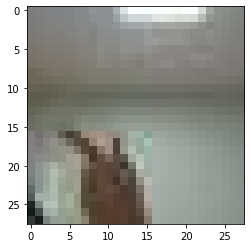

In [42]:
import matplotlib.pyplot as plt

plt.imshow(x_train_norm[7])
print('라벨: ', y_train[7])

In [43]:
# test data load 하기
image_dir_path = "./rock_scissor_paper/test"
(x_test, y_test) = load_data(image_dir_path)
x_test_norm = x_test/255.0  #입력은 0-1 사이의 값으로 정규화

print('x_test shape: {}'.format(x_test.shape))
print('y_test_shape: {}'.format(y_test.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다
x_test shape: (300, 28, 28, 3)
y_test_shape: (300,)


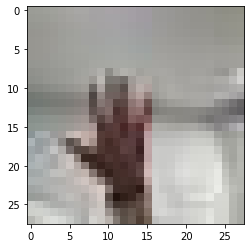

In [44]:
plt.imshow(x_test_norm[200])

#### 딥러닝 네트워크 설계하기

In [45]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

model = keras.models.Sequential()

model.add(keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation = 'relu'))
model.add(keras.layers.Dense(3, activation = 'softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 1, 1, 128)        

#### 딥러닝 네트워크 학습 및 테스트 시키기

In [46]:
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

model.fit(x_train_norm, y_train, epochs = 10)

test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose = 1)
print('test_loss: {}'.format(test_loss))
print('test_accuracy: {}'.format(test_accuracy))

Epoch 1/10
10/10 [==============================] - 0s 10ms/step - loss: 1.1004 - accuracy: 0.3367
Epoch 2/10
10/10 [==============================] - 0s 10ms/step - loss: 1.1045 - accuracy: 0.3367
Epoch 3/10
10/10 [==============================] - 0s 9ms/step - loss: 1.0774 - accuracy: 0.4200
Epoch 4/10
10/10 [==============================] - 0s 9ms/step - loss: 1.0265 - accuracy: 0.5700
Epoch 5/10
10/10 [==============================] - 0s 9ms/step - loss: 0.9572 - accuracy: 0.5733
Epoch 6/10
10/10 [==============================] - 0s 10ms/step - loss: 0.9519 - accuracy: 0.5400
Epoch 7/10
10/10 [==============================] - 0s 10ms/step - loss: 0.9204 - accuracy: 0.5667
Epoch 8/10
10/10 [==============================] - 0s 11ms/step - loss: 0.8734 - accuracy: 0.6167
Epoch 9/10
10/10 [==============================] - 0s 9ms/step - loss: 0.8580 - accuracy: 0.6267
Epoch 10/10
10/10 [==============================] - 0s 4ms/step - loss: 0.6767 - accuracy: 0.7667
test_loss: 0.6